In [1]:
import matplotlib.pyplot as plt  
import numpy as np  
import pickle  
import os 
import random
import pandas as pd
import seaborn as sns 
import plotly.graph_objects as go

In [2]:
def is_prime(n):
    for k in range(n) :
        if n <= 1:  
            return False  
        for i in range(2, int(n**0.5) + 1):  
            if n % i == 0:  
                return False  
        return True  

In [3]:
def generate_primes(limit, filename="prime_data.pkl"):  
    if os.path.exists(filename):  
        with open(filename, 'rb') as f:  
            data = pickle.load(f)  
            primes = data['primes']  
            last_number = primes[-1] if primes else 1  
            if limit <= last_number:  
                print("Data already exists for this limit.")  
                return primes[:limit]  
            else:  
                new_primes = [number for number in range(last_number + 1, limit) if is_prime(number)]  
                primes.extend(new_primes)  
                print(f"Calculated primes from {last_number + 1} to {limit}")  
    else:  
        primes = [number for number in range(2, limit) if is_prime(number)]  
        print(f"Calculated primes from scratch up to {limit}")  

    return primes  

In [4]:
def create_and_save_data(limit, filename="prime_data.pkl"):  
    prime_numbers = generate_primes(limit, filename)  
    r = np.array(prime_numbers)  
    theta = np.array(prime_numbers)  

    with open(filename, 'wb') as f:  
        pickle.dump({  
            'primes': prime_numbers,  
            'r': r,  
            'theta': theta  
        }, f)  
    print(f"Data saved to {filename}")  

Calculated primes from 12 to 50000
Data saved to prime_data.pkl
Plot saved to svgE:/ww2/conferance/prime_plot0.09260852001154429.svg
Plot saved to pngE:/ww2/conferance/prime_plot0.6456801957260295.png


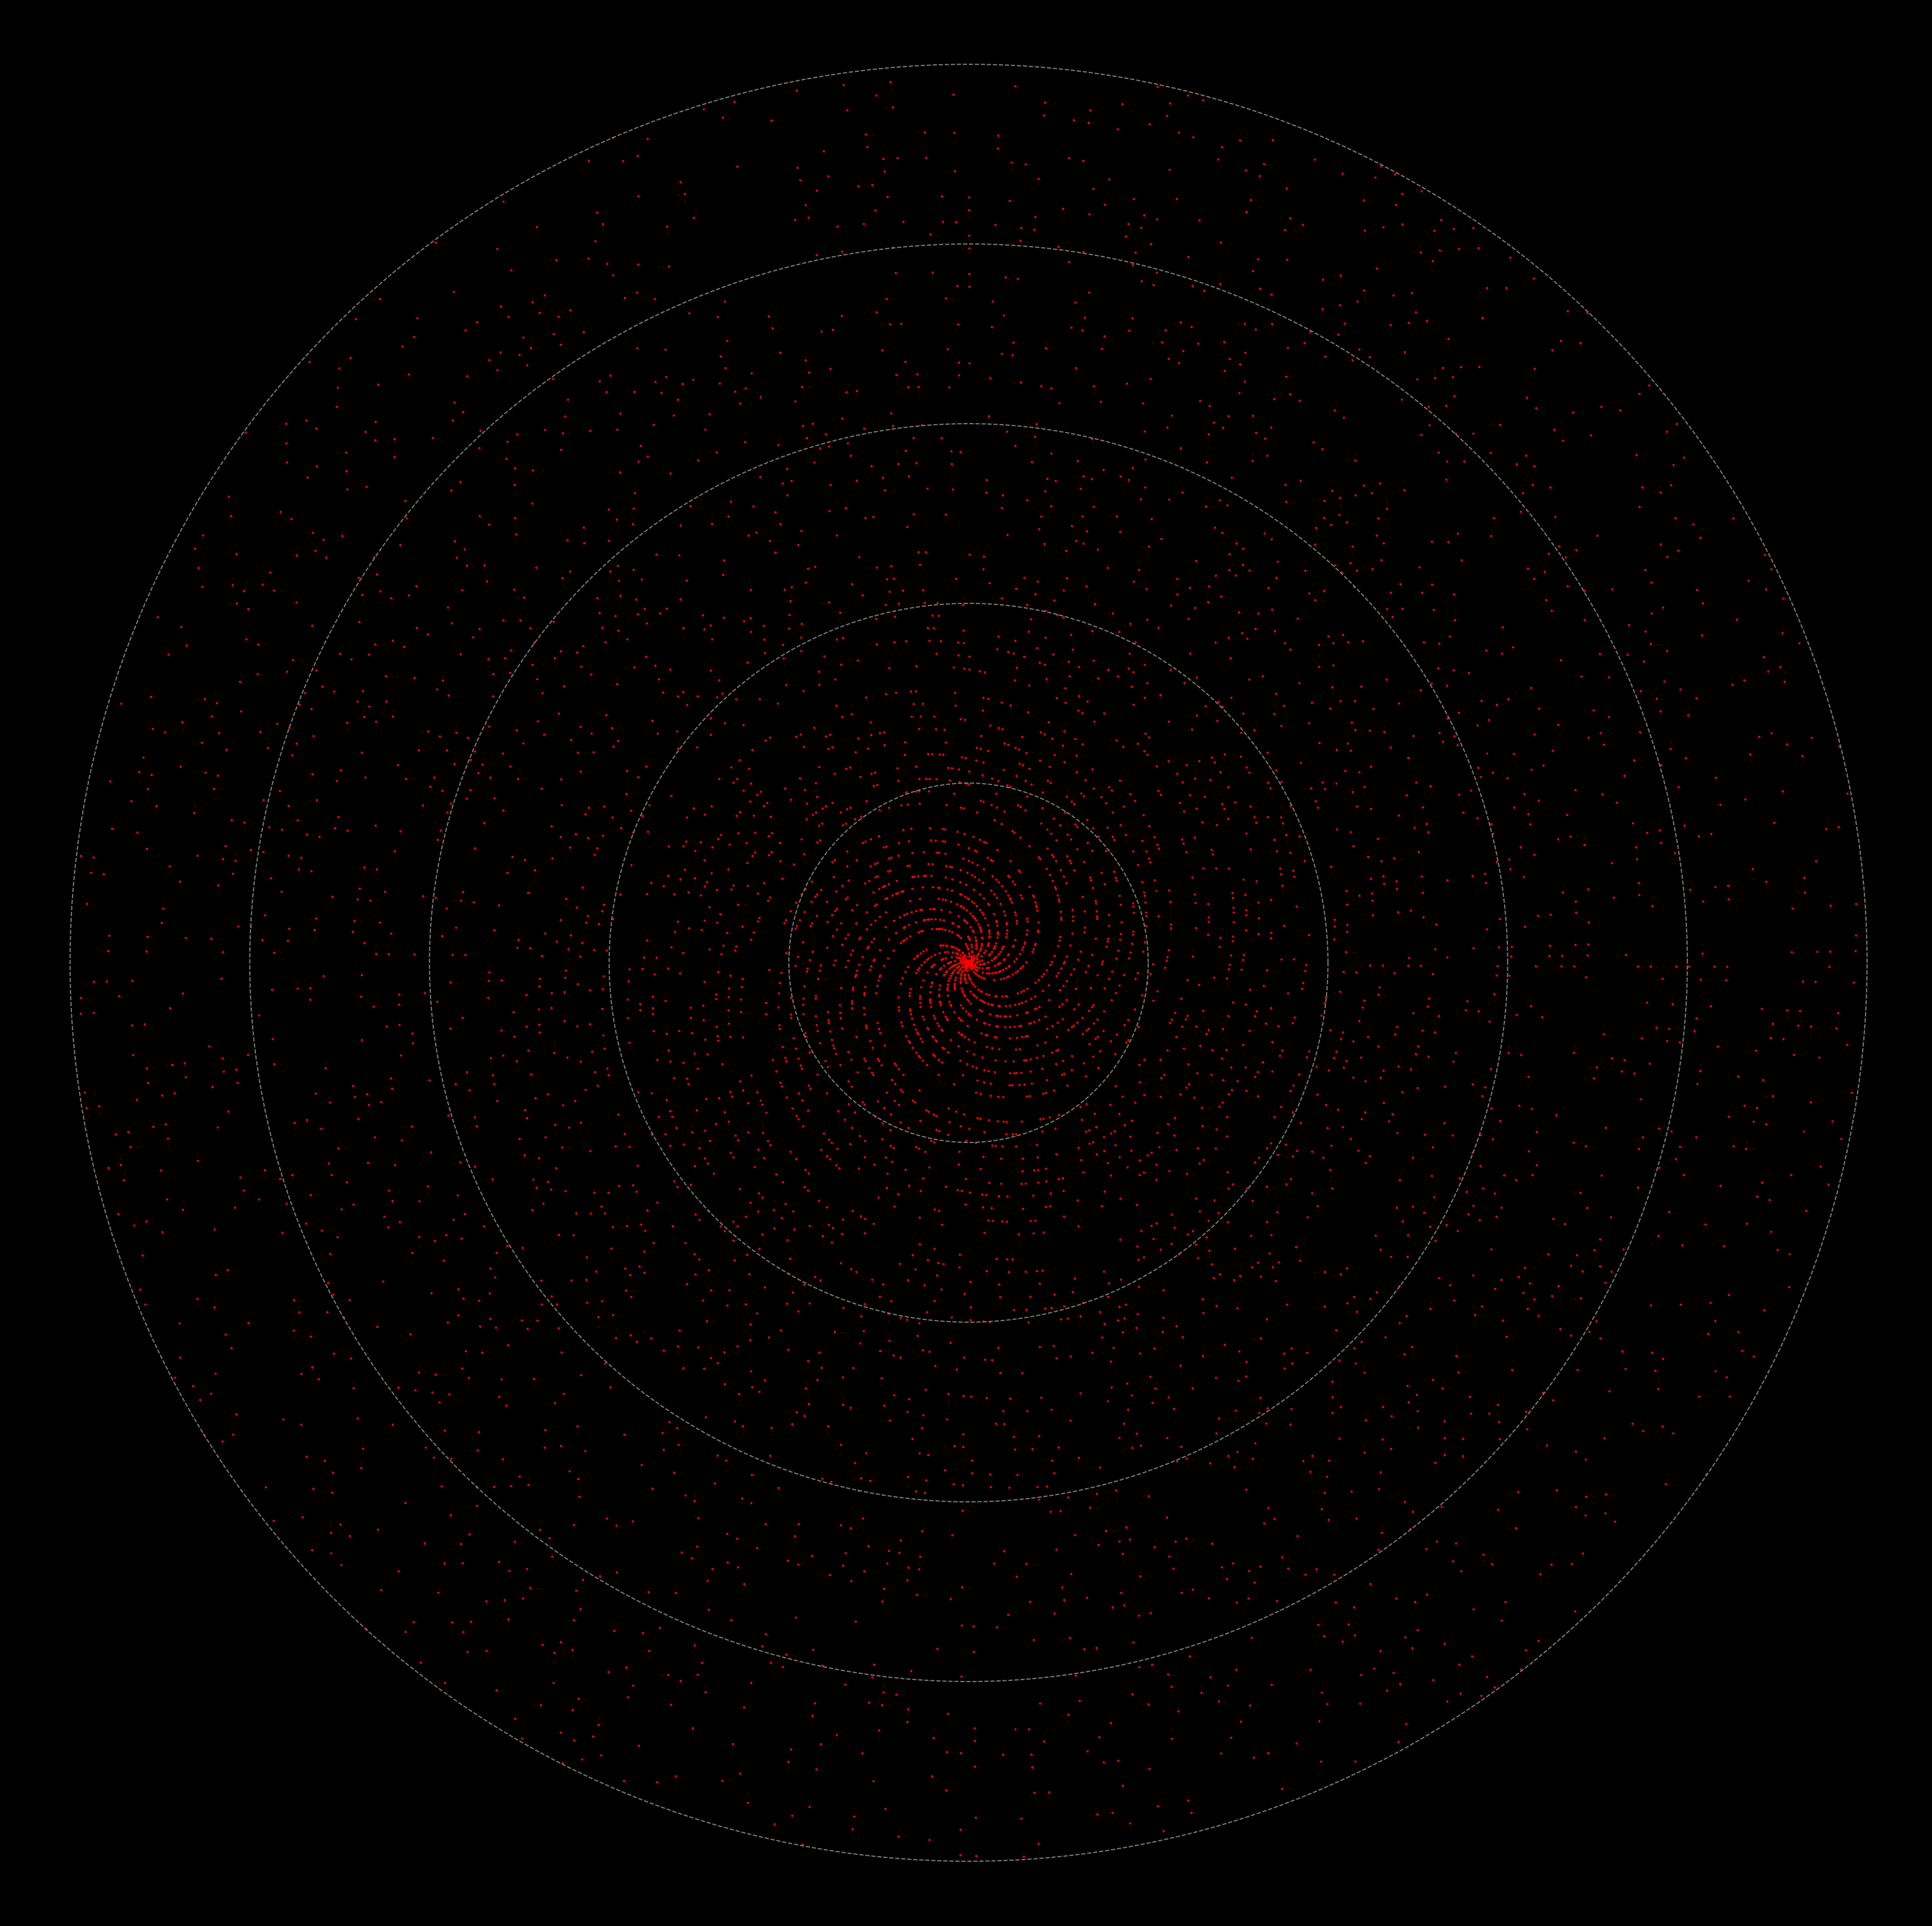

In [9]:
r_ = []
t_degrees = []
t_radian = []
prime_ = []
a_filter = []
theta_rad_saved = []
r0_saved = []
theta_deg_saved = []
def load_and_plot_data(start_limit, end_limit, filename="prime_data.pkl", filepath="E:/ww2/conferance/"):  
    global r_ , t_degrees , t_radian , prime_ , a_filter,theta_rad_saved,r0_saved,theta_deg_saved
    if not os.path.exists(filename):  
        print("Data file does not exist. Please create the data first.")  
        return  

    with open(filename, 'rb') as f:  
        data = pickle.load(f)  
    prime_numbers = data['primes']  
    r = data['r']  
    theta = data['theta']

    filtered_primes = [p for p in prime_numbers if start_limit <= p <= end_limit]  
    #r = np.array(filtered_primes)  
    #theta = np.array(filtered_primes)  
    #te_ = np.floor(np.array(filtered_primes) / 6.28).astype(int)
    #te1 = np.array(r - (te_ * 6.28))
    #te1_degrees = np.degrees(te1)  
    
    for num in filtered_primes:
        last_digit = num % 10
        if last_digit not in [0,1,2,3,4,5,6,7,8,9]:  
        #if last_digit != 1 :
            continue 
            
        r0 = num 
        teta_rad = r0 % (2 * np.pi)
        theta_deg = np.degrees(r0 % (2 * np.pi)) 
        
        #if (0 <= theta_deg <= 90) or (210 <= theta_deg <= 230) or (250 <= theta_deg <= 270):  
        if 0 <= theta_deg <= 360:
            a_filter.append(num)
            
            theta_rad_saved.append(teta_rad)
            r0_saved.append(r0)
            theta_deg_saved.append(theta_deg)

    a_filter_ = np.array(a_filter)

    
    for i in r0_saved : 
        r_.append(i)
    for j in theta_deg_saved :
        t_degrees.append(j)
    for k in theta_rad_saved :
        t_radian.append(k)
                
    color_mapping = {  
        1: 'red',  
        3: 'red',  
        7: 'red',  
        9: 'red'  
        }

    #color_mapping = {  1: 'red',  3: 'red',  7: 'red',  9: 'blue',  2: 'green',  4: 'yellow',  5: 'white'  

    r_filtered = np.array(a_filter)
    theta_filtered = np.array([num % (2 * np.pi) for num in a_filter]) 

    colors = [color_mapping.get(num % 10, 'black') for num in a_filter]  # تغییر به a_filter

    plt.figure(figsize=(45, 45), facecolor='black')  
    ax = plt.subplot(111, projection='polar')  
    ax.set_facecolor('black')  
    ax.grid(color='gray', linestyle='--', linewidth=1.5)  
    ax.yaxis.grid(True)  
    ax.xaxis.grid(False)  
    
    ax.scatter(theta_filtered, r_filtered, color=colors, s=4)
    for i in range(0, 360, 5):  
        angle_rad = np.radians(i)  
        ax.text(angle_rad, max(r_filtered) * 1.05, f"{i}°", horizontalalignment='center', verticalalignment='center', fontsize=10)  

    if not os.path.exists(filepath):  
        os.makedirs(filepath)  
    
    plot_filename = os.path.join(filepath, f'prime_plot{random.random()}.svg')  
    plt.savefig(plot_filename, format='svg', dpi=30, bbox_inches='tight', facecolor='white')  
    print(f"Plot saved to svg{plot_filename}")  
    
    plot_filename = os.path.join(filepath, f'prime_plot{random.random()}.png')  
    plt.savefig(plot_filename, format='png', dpi=30, bbox_inches='tight', facecolor='white')  
    print(f"Plot saved to png{plot_filename}")  

    plt.show() 
create_and_save_data(50000)  
load_and_plot_data(1, 50000) 